In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Lambda, Dense, Flatten
from keras.preprocessing import image
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [0]:
img_width, img_height, img_channels = 224, 224, 3

In [0]:
vgg = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(img_width, img_height, img_channels))

In [0]:
for layer in vgg.layers:
  layer.trainable = False

In [0]:
x = vgg.output

In [0]:
x = Flatten()(x)

In [0]:
output = Dense(2, activation='softmax')(x)

In [0]:
from keras.models import Model

In [0]:
model = Model(inputs=vgg.input, outputs=output)

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/chest_xray/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 1986 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory(
        '/content/drive/My Drive/chest_xray/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 624 images belonging to 2 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
63/63 [==============================] - 57s 900ms/step - loss: 0.0126 - accuracy: 0.9869 - val_loss: 13.2797 - val_accuracy: 0.6250
Epoch 2/5
63/63 [==============================] - 48s 765ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 26.2224 - val_accuracy: 0.6250
Epoch 3/5
63/63 [==============================] - 49s 778ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 7.9320 - val_accuracy: 0.6250
Epoch 4/5
63/63 [==============================] - 49s 780ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 12.7051 - val_accuracy: 0.6250
Epoch 5/5
63/63 [==============================] - 49s 774ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 23.1226 - val_accuracy: 0.6250


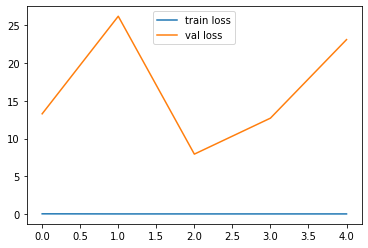

In [19]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

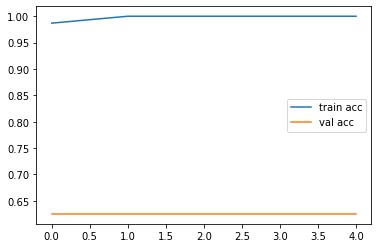

In [20]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()